In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = data.drop(["Gender", "User ID"], axis=1)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

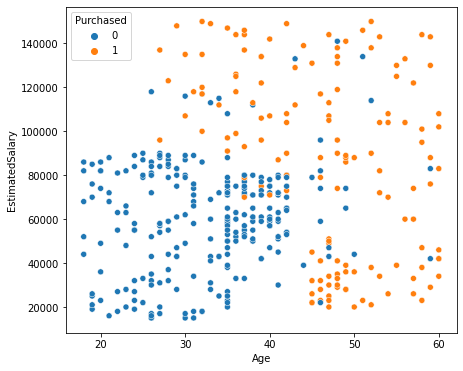

In [7]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue="Purchased")

In [8]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
# feature scaling

from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_train_transformed = std_sc.fit_transform(X_train)

# X_train_transformed = std_sc.transform(X_train)
X_test_transformed = std_sc.transform(X_test)

# X_train_transformed

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_transformed, y_train)

preds = model.predict(X_test_transformed)


In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, preds))

0.825


In [12]:
xx, yy = np.meshgrid(
    np.arange(X_train_transformed[:, 0].min() - 1, X_train_transformed[:, 0].max() + 1, 0.01),
    np.arange(X_train_transformed[:, 1].min() - 1, X_train_transformed[:, 1].max() + 1, 0.01)
)

In [13]:
grid_points = np.array([xx.ravel(), yy.ravel()]).T

In [14]:
Z = model.predict(grid_points)

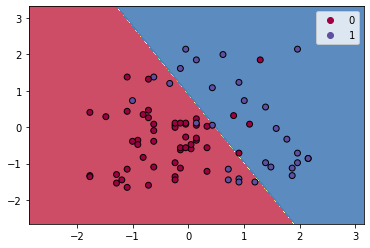

In [15]:
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap="Spectral", alpha=0.85)
scatter = plt.scatter(X_test_transformed[:,0], X_test_transformed[:, 1], cmap="Spectral",
                      c=y_test, s=35, edgecolors='k')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1])

In [16]:
def plot_decision_boundary(model, X_data, y_data, xx, yy, grid_points):
    
    assert len(X_data) == len(y_data), "must be of same lengths"
    
    Z = model.predict(grid_points)
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap="Spectral", alpha=0.85)
    scatter = plt.scatter(X_data[:,0], X_data[:, 1], cmap="Spectral",
                      c=y_data, s=35, edgecolors='k')
    
    plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1])

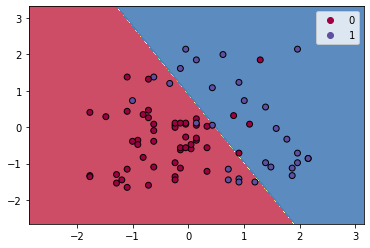

In [17]:
plot_decision_boundary(model, X_test_transformed, y_test, xx, yy, grid_points)

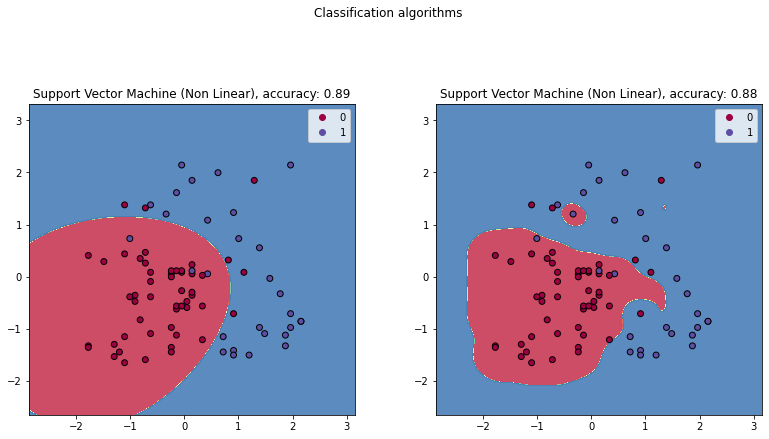

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


models = [
         (SVC(gamma=0.1), "Support Vector Machine (Non Linear)"),
         (SVC(gamma=10), "Support Vector Machine (Non Linear)"),
]




fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=5)
fig.suptitle("Classification algorithms", y=1.1)
axs = axs.ravel()

for i, model in enumerate(models):
#     print(model)
    fig.sca(axs[i])
    model[0].fit(X_train_transformed, y_train)
    plot_decision_boundary(model[0], X_test_transformed, y_test, xx, yy, grid_points)
    acc = accuracy_score(y_test, model[0].predict(X_test_transformed))
    plt.title(model[1] + f", accuracy: {acc:.2f}")
    
    